### 1-d Case nonliear switching case

consider the following model
$$
\begin{align*}
\begin{cases}
x_{n+1}=x_n+\eta \sin(5\alpha_n x_n)+\sqrt{\eta} \sigma u_n, \quad \sigma=0.6\\
y_{n+1}=y_n+\eta 2 x_n +\sqrt{\eta} \sigma_1 v_n, \quad \sigma_1=0.2
\end{cases}
\end{align*}
$$

we let the step size $\eta=0.04$ and inital value $x_0=y_0=0$

In [1]:
import ex1_loader
import ex1_generator
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'
from sklearn.metrics import mean_squared_error

In [2]:
PATH_TRAIN='../data/ex1Train.pklz'

dimX=1; N=100; n0=10; eta=0.04; dimY=1

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=ex1_loader.load_data_wrapper(PATH_TRAIN)

# Calculate MSE Error
test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),1)
len(training_data)

16956

In [3]:
# The num of first layer is n0*dimY, the num of last layer is dimX.
net=nn_DF.Network([n0*dimY, 32, 16, 8, 8, dimX])
epoch=200

In [4]:
tcMSE_EpochAdalr1,tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.001, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.005, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr10, tcRel_EpochAdalr10, ecMSE_EpochAdalr10, ecRel_EpochAdalr10, w_EpochAdalr10, b_EpochAdalr10, EpochAdalr10\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.01, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.0011922576666306963
Epoch 0: 0.8210100108333793
The eta of Epoch 1 is 0.0013844802434771339
Epoch 1: 0.5399644330441288
The eta of Epoch 2 is 0.0014251759450093207
Epoch 2: 0.42579312560260124
The eta of Epoch 3 is 0.0014394010788883365
Epoch 3: 0.3957787655759545
The eta of Epoch 4 is 0.001446201957660361
Epoch 4: 0.38593402816351763
The eta of Epoch 5 is 0.0014530270810199065
Epoch 5: 0.38081317317877034
The eta of Epoch 6 is 0.0014577742561715686
Epoch 6: 0.3772014092471173
The eta of Epoch 7 is 0.0014622254638565584
Epoch 7: 0.37439703469145963
The eta of Epoch 8 is 0.001465459675322165
Epoch 8: 0.3712083587250774
The eta of Epoch 9 is 0.001469416629207567
Epoch 9: 0.36863458055529896
The eta of Epoch 10 is 0.001472537216404878
Epoch 10: 0.3662640056671102
The eta of Epoch 11 is 0.0014753186580225125
Epoch 11: 0.3636991142772989
The eta of Epoch 12 is 0.001481978594767031
Epoch 12:

In [5]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1,constlr1\
=net.SGD_Constlr(training_data, epoch, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5, tcRel_constlr5, ecMSE_constlr5, ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, epoch, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr10, tcRel_constlr10, ecMSE_constlr10, ecRel_constlr10, w_constlr10, b_constlr10, constlr10\
=net.SGD_Constlr(training_data, epoch, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 0.8219888332577121
The eta of Epoch 1 is 0.001
Epoch 1: 0.5728759831039355
The eta of Epoch 2 is 0.001
Epoch 2: 0.45341792483625204
The eta of Epoch 3 is 0.001
Epoch 3: 0.41221469399899396
The eta of Epoch 4 is 0.001
Epoch 4: 0.3955610545919033
The eta of Epoch 5 is 0.001
Epoch 5: 0.38791508609025405
The eta of Epoch 6 is 0.001
Epoch 6: 0.38359393690969806
The eta of Epoch 7 is 0.001
Epoch 7: 0.3804128422940777
The eta of Epoch 8 is 0.001
Epoch 8: 0.37808778388828834
The eta of Epoch 9 is 0.001
Epoch 9: 0.3755774751650899
The eta of Epoch 10 is 0.001
Epoch 10: 0.37386843462040603
The eta of Epoch 11 is 0.001
Epoch 11: 0.3718475060724032
The eta of Epoch 12 is 0.001
Epoch 12: 0.37002020573769
The eta of Epoch 13 is 0.001
Epoch 13: 0.368071908790309
The eta of Epoch 14 is 0.001
Epoch 14: 0.3663633431128564
The eta of Epoch 15 is 0.001
Epoch 15: 0.364725820289635
The eta

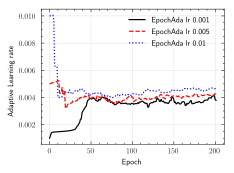

In [11]:
epochs=np.linspace(0,epoch+1,epoch+1)
plt.style.reload_library()
with plt.style.context(['science','ieee']):
    plt.plot(epochs,EpochAdalr1, epochs,EpochAdalr5,epochs, EpochAdalr10,linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Adaptive Learning rate")

plt.savefig("../img/ex1-lr.pdf", dpi=600,bbox_inches = 'tight')

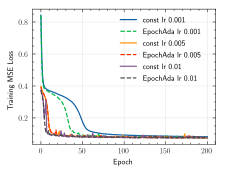

In [12]:
Epochs=np.linspace(0,epoch,epoch)
plt.style.reload_library()
with plt.style.context(['science','ieee','std-colors']):
    plt.plot(Epochs, tcMSE_constlr1, Epochs, tcMSE_EpochAdalr1,"--", Epochs, tcMSE_constlr5,\
         Epochs,tcMSE_EpochAdalr5,'--',Epochs, tcMSE_constlr10,Epochs,tcMSE_EpochAdalr10,'--',linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Training MSE Loss")
    
plt.savefig("../img/ex1-loss.pdf", dpi=600,bbox_inches = 'tight')

### Compute relative error

In [13]:
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label,label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    print("MSE and RelErr are: {0},{1}".format(mseErr, RelErr))

Repeat Monte Carlo 256 times to compute the average relative error on new-generated data

In [27]:
import ex1_generator

N_sample=256
P= np.array([[0.98,0.02],[0.02,0.98]])

TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))

for i in range(N_sample):
    alpha=ex1_generator.mChain(N,P)
    datas1, labels1, x_new1=ex1_generator.generate_new_data(data_mean, data_std, alpha)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [28]:
NewPred_constlr1=net.predict(TotalDatas, w_constlr1, b_constlr1, label=False)
NewPred_constlr5=net.predict(TotalDatas, w_constlr5, b_constlr5, label=False)
NewPred_constlr10=net.predict(TotalDatas, w_constlr10, b_constlr10, label=False)
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr10=net.predict(TotalDatas, w_EpochAdalr10, b_EpochAdalr10, label=False)

ComputeError(NewPred_constlr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr10, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr10, TotalLabels, label_mean, label_std, dimX)

MSE and RelErr are: 0.088971174105689,0.1507585804125546
MSE and RelErr are: 0.08097733206808974,0.14273134034612686
MSE and RelErr are: 0.07945975722026487,0.14169046528111268
MSE and RelErr are: 0.08914122987235804,0.15568941309656015
MSE and RelErr are: 0.08224511614964554,0.14339308302991402
MSE and RelErr are: 0.08025397014771266,0.14354153672825953


### Plot sample path

According to the evolution of the adaptive learning rate, it converges to around 0.003.
We retrain the model with learning rate 0.003.

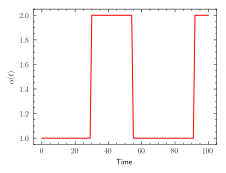

In [19]:
np.random.seed(22)
ru=np.random.uniform(0,1,size=N)
P= np.array([[0.98,0.02],[0.02,0.98]])
x0=0

alpha=ex1_generator.mChain(N,P,ru)
datas, labels, x_new =ex1_generator.generate_new_data(data_mean, data_std, alpha)

plt.style.reload_library()
with plt.style.context(['science','ieee']):

    plt.plot(alpha,'r')
    plt.xlabel("Time")
    plt.ylabel(r'$ \alpha (t) $')
plt.savefig("../img/ex1-alpha.pdf", dpi=600,bbox_inches = 'tight')

In [18]:
tcMSE_constlr, tcRel_constlr, ecMSE_constlr, ecRel_constlr, w_constlr, b_constlr,constlr\
=net.SGD_Constlr(training_data, epoch, 64, 0.004, evaluation_data=validation_data)

tcMSE_EpochAdalr,tcRel_EpochAdalr, ecMSE_EpochAdalr, ecRel_EpochAdalr, w_EpochAdalr, b_EpochAdalr, EpochAdalr\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.004, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.004
The eta of Epoch 0 is 0.004
Epoch 0: 0.4119025233843077
The eta of Epoch 1 is 0.004
Epoch 1: 0.3807139771478328
The eta of Epoch 2 is 0.004
Epoch 2: 0.37211567268877155
The eta of Epoch 3 is 0.004
Epoch 3: 0.36444629160386266
The eta of Epoch 4 is 0.004
Epoch 4: 0.3561869513971855
The eta of Epoch 5 is 0.004
Epoch 5: 0.34823247972484417
The eta of Epoch 6 is 0.004
Epoch 6: 0.33791190316065467
The eta of Epoch 7 is 0.004
Epoch 7: 0.32362676715486377
The eta of Epoch 8 is 0.004
Epoch 8: 0.3068559396366232
The eta of Epoch 9 is 0.004
Epoch 9: 0.28327446138144813
The eta of Epoch 10 is 0.004
Epoch 10: 0.2469122583629288
The eta of Epoch 11 is 0.004
Epoch 11: 0.1948009481835149
The eta of Epoch 12 is 0.004
Epoch 12: 0.14221579708305176
The eta of Epoch 13 is 0.004
Epoch 13: 0.11370906292707501
The eta of Epoch 14 is 0.004
Epoch 14: 0.11065219858644718
The eta of Epoch 15 is 0.004
Epoch 15: 0.10248859255458424

In [20]:
pr_const=net.predict(datas,w_constlr, b_constlr,label=False)
pr_const=np.array(pr_const)
pr_const=pr_const.reshape(len(pr_const),dimX)
for k in range(N-n0+2):
    pr_const[k,:]=pr_const[k,:]*label_std+label_mean
const_new=[x0 for k in range(n0-1)]
const_new=np.array(const_new)
const_new=const_new.reshape(n0-1,dimX)
const_new=np.vstack((const_new,pr_const))

In [21]:
pr_ada=net.predict(datas,w_EpochAdalr, b_EpochAdalr,label=False)
pr_ada=np.array(pr_ada)
pr_ada=pr_ada.reshape(len(pr_ada),dimX)
for k in range(N-n0+2):
    pr_ada[k,:]=pr_ada[k,:]*label_std+label_mean
ada_new=[x0 for k in range(n0-1)]
ada_new=np.array(ada_new)
ada_new=ada_new.reshape(n0-1,dimX)
ada_new=np.vstack((ada_new,pr_ada))

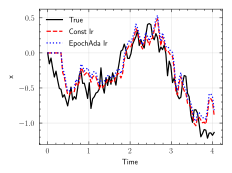

In [23]:
axis=np.linspace(0,eta*(N+1),N+1)

plt.style.reload_library()
with plt.style.context(['science','ieee']):

    fig, ax=plt.subplots()
    ax.plot(axis,x_new[:,0],axis,const_new[:,0],axis, ada_new[:,0],linewidth=1.2)
    ax.minorticks_on()
    ax.grid(alpha=0.35)
    ax.set(xlabel="Time", ylabel="x")
    ax.legend(["True","Const lr","EpochAda lr"],prop={'size':8}, edgecolor="black")

plt.savefig("../img/ex1-path.pdf",dpi=600, bbox_inches = 'tight')

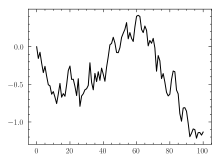

In [24]:
plt.style.reload_library()
with plt.style.context(['science','ieee']):
    plt.plot(x_new)